# Algoritmo K-means (Core)

El algoritmo K-means es uno de los métodos de agrupamiento más utilizados en análisis de datos y machine learning. Este algoritmo busca agrupar un conjunto de datos en K grupos o clusters, donde cada grupo está definido por un centroide. En esta actividad, utilizaremos el algoritmo K-means para analizar y segmentar clientes en función de su comportamiento de compra, utilizando el dataset «Mall Customer Segmentation Data» de Kaggle.

**Enlace al dataset**: [Mall Customer Segmentation Data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

## Objetivo de la Actividad

El objetivo de esta actividad es utilizar el algoritmo K-means para identificar diferentes grupos de clientes según su comportamiento de compra. El análisis de los clusters resultantes permitirá obtener una mejor comprensión de las características de los clientes, lo que puede ser útil para personalizar estrategias de marketing y mejorar la experiencia del cliente.

## Descripción del Algoritmo K-means

K-means es un algoritmo de aprendizaje no supervisado que agrupa datos en K clusters o grupos, donde K es un número predefinido. Cada cluster se representa mediante un centroide, que es el promedio de todos los puntos de datos en ese grupo. El algoritmo tiene dos fases principales:

1. **Asignación de clusters**: Cada punto de datos se asigna al centroide más cercano.
2. **Actualización de centroides**: Se recalcula la posición de los centroides basándose en la media de los puntos de datos asignados a cada cluster.

Este proceso se repite hasta que los centroides no cambian significativamente o se alcanza un número máximo de iteraciones.

## Instrucciones

### 1. Carga del Dataset
- El dataset contiene información sobre clientes de un centro comercial, como su género, edad, ingresos anuales y puntaje de gasto.
- Utiliza el archivo «Mall_Customers.csv» y cárgalo en tu entorno de trabajo.

### 2. Selección de Variables
- Para este análisis, selecciona las variables **‘Annual Income (k$)’** y **‘Spending Score (1-100)’**, ya que representan características importantes relacionadas con el comportamiento de compra.

### 3. Implementación de K-means
- Aplica el algoritmo K-means utilizando diferentes valores de K (por ejemplo, K = 3, 4, 5) y observa cómo se agrupan los clientes.
- Visualiza los resultados utilizando gráficos de dispersión que representen los clusters y los centroides.

### 4. Elbow Method
- Utiliza el método del codo para identificar el número óptimo de clusters. Este método consiste en ejecutar K-means con diferentes valores de K y calcular la suma de errores cuadráticos (SSE). El valor óptimo de K se encuentra donde se produce una disminución significativa en el SSE.

### 5. Interpretación de Clusters
- Una vez obtenidos los clusters, analiza cada grupo. ¿Qué características tienen en común los clientes de cada cluster? ¿Cómo podrías usar esta información para diseñar estrategias de marketing personalizadas?

### 6. Análisis de Resultados
- Discute los resultados obtenidos. ¿Qué insights se pueden extraer de los grupos de clientes identificados? ¿Existen patrones o comportamientos comunes?

## Expansión del Algoritmo y Aplicaciones

El algoritmo K-means tiene una amplia gama de aplicaciones en diversas industrias. Algunos ejemplos incluyen:

- **Segmentación de Clientes**: Agrupar a los clientes según su comportamiento de compra o interacción con un producto.
- **Compresión de Imágenes**: Reducir el número de colores en una imagen agrupando píxeles similares.
- **Agrupación de Documentos**: Clasificar documentos en función de su similitud textual.

En esta actividad, el enfoque está en la segmentación de clientes para un centro comercial, pero el mismo algoritmo puede aplicarse a otros dominios como la biología, el procesamiento de señales y la detección de anomalías.


In [45]:
#Importar Librerias Necesarias
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [46]:
# 1. Carga de datos
dataset_path = r'C:\Users\GIGABYTE\Documents\tareas_bootcamp_coding_dojo\mod_3_advanced_machine_learning\data\mall_customers.csv'""  
df_train = pd.read_csv(dataset_path)


In [47]:
# Exploración inicial de datos
print("Primeras filas del dataset:")
df_train.head()


Primeras filas del dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
print("\nInformación del dataset:")
df_train.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [49]:
# Renombrar columnas del dataset
df_train.columns = (
    df_train.columns
    .str.strip()               # Elimina espacios iniciales y finales
    .str.replace("'", "")      # Elimina comillas simples
    .str.replace("-", "_")     # Reemplaza guiones por guiones bajos
    .str.replace(" ", "_")     # Reemplaza espacios por guiones bajos
    .str.lower()               # Convierte todo a minúsculas
)

# Mostrar nombres de las columnas normalizados
print(df_train.columns)

Index(['customerid', 'gender', 'age', 'annual_income_(k$)',
       'spending_score_(1_100)'],
      dtype='object')


In [50]:
# 3. Selección de las variables relevantes para el análisis
df_selected = df_train[['annual_income_(k$)', 'spending_score_(1_100)']]


In [51]:
# 4. Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

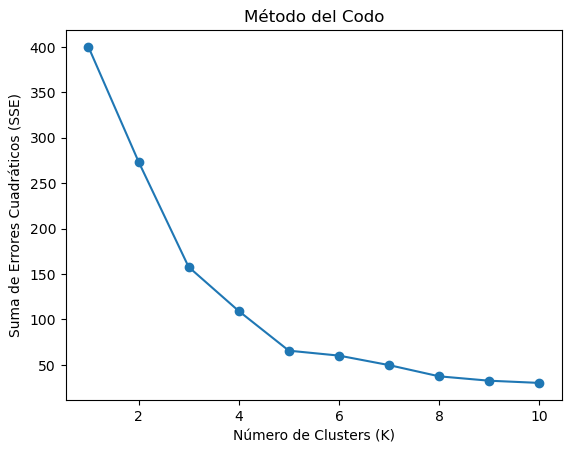

In [52]:
# 5. Aplicación del algoritmo K-means con diferentes valores de K
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

# Ahora ejecuta tu código como de costumbre

import os
os.environ["OMP_NUM_THREADS"] = "1"

# Ahora puedes continuar con tu código de KMeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Método del codo para determinar el número óptimo de clusters
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(k_range, sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Suma de Errores Cuadráticos (SSE)')
plt.show()


In [53]:
# 6. Aplicar K-means con el número óptimo de clusters (supongamos que K=5)
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Aplicar KMeans con el número óptimo de clusters (K=5)
from sklearn.cluster import KMeans

kmeans_optimal = KMeans(n_clusters=5, random_state=42)
df_train['cluster'] = kmeans_optimal.fit_predict(df_scaled)


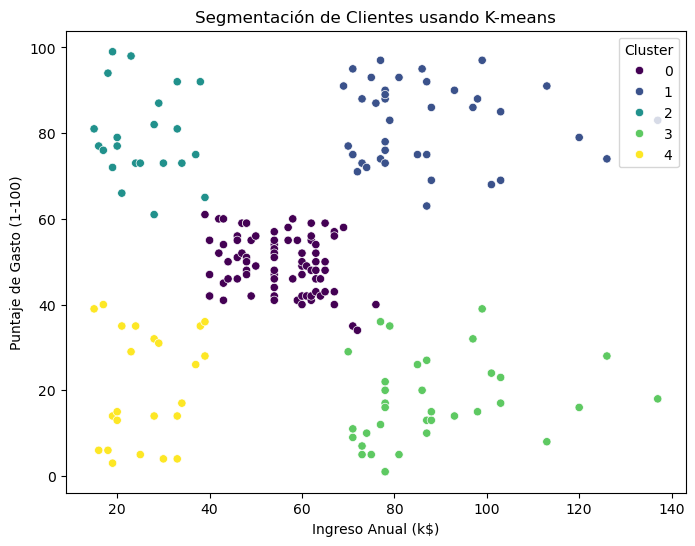

In [54]:
# 7. Visualización de los resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_train, x='annual_income_(k$)', y='spending_score_(1_100)', hue='cluster', palette='viridis')
plt.title('Segmentación de Clientes usando K-means')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [15]:
# 8. Análisis de los clusters
print("\nCentroides de los clusters:")
centroids = kmeans_optimal.cluster_centers_
print(centroids)


Centroides de los clusters:
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


In [16]:
# Asignar los centroides a las columnas para su análisis
centroids_df = pd.DataFrame(centroids, columns=['annual_income_(k$)', 'spending_score_(1_100)'])
print("\nCentroides de los clusters:")
print(centroids_df)



Centroides de los clusters:
   annual_income_(k$)  spending_score_(1_100)
0           -0.200913               -0.026456
1            0.991583                1.239503
2           -1.329545                1.132178
3            1.055003               -1.284439
4           -1.307519               -1.136965


In [17]:
# Resumen de cada cluster
print("\nDistribución de clientes por cluster:")
print(df_train['cluster'].value_counts())


Distribución de clientes por cluster:
cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


---

### Análisis de Resultados

#### Discusión de los Resultados de K-means
El algoritmo de K-means ha sido aplicado al conjunto de datos, agrupando a los clientes en 5 clusters según dos características clave: **ingreso anual** (en miles de dólares) y **puntuación de gasto** (en una escala de 1 a 100). Los centroides de cada cluster nos proporcionan información relevante sobre las características generales de cada grupo de clientes:

1. **Cluster 0**:
   - **Ingreso anual**: Bajo (cerca de -0.2)
   - **Puntuación de gasto**: Muy baja (cerca de -0.03)
   - **Insight**: Este grupo parece estar compuesto por clientes con ingresos anuales bajos y un bajo nivel de gasto. Podrían ser clientes con menos capacidad de compra o que no están tan comprometidos con el centro comercial.

2. **Cluster 1**:
   - **Ingreso anual**: Alto (cerca de 1.0)
   - **Puntuación de gasto**: Alta (cerca de 1.24)
   - **Insight**: Este cluster está formado por clientes con altos ingresos y una alta puntuación de gasto. Son probablemente los clientes más valiosos, ya que no solo tienen una gran capacidad económica, sino que también gastan más en el centro comercial. Podrían ser un segmento clave para programas de fidelización o promociones exclusivas.

3. **Cluster 2**:
   - **Ingreso anual**: Bajo (cerca de -1.33)
   - **Puntuación de gasto**: Alta (cerca de 1.13)
   - **Insight**: Este grupo incluye clientes con ingresos bajos pero una puntuación de gasto relativamente alta. A pesar de tener un ingreso limitado, están dispuestos a gastar más en el centro comercial. Puede ser útil identificar productos o servicios que atraigan a este tipo de clientes, como ofertas especiales o descuentos.

4. **Cluster 3**:
   - **Ingreso anual**: Alto (cerca de 1.06)
   - **Puntuación de gasto**: Baja (cerca de -1.28)
   - **Insight**: Este cluster está compuesto por clientes con altos ingresos, pero con una baja puntuación de gasto. A pesar de su capacidad económica, no están gastando mucho en el centro comercial. Este segmento podría estar interesado en optimizar su experiencia de compra o en recibir incentivos para aumentar su nivel de gasto.

5. **Cluster 4**:
   - **Ingreso anual**: Bajo (cerca de -1.31)
   - **Puntuación de gasto**: Baja (cerca de -1.14)
   - **Insight**: Este grupo tiene tanto ingresos bajos como una baja puntuación de gasto. Podrían ser clientes que no frecuentan mucho el centro comercial o que prefieren productos más asequibles. El desafío podría ser entender cómo aumentar su interés o atraerlos con productos más accesibles.

#### Distribución de los Clientes por Cluster
La distribución de clientes en los distintos clusters muestra que la mayoría de los clientes se encuentran en el **Cluster 0**, con 81 clientes. Esto sugiere que la mayor parte de la población se agrupa en el segmento con ingresos bajos y bajo gasto. A medida que se avanza en los números de los clusters, la cantidad de clientes disminuye, siendo el **Cluster 2** el más pequeño con solo 22 clientes. Esto podría indicar que los segmentos con clientes de mayor gasto son menos comunes, pero probablemente más valiosos.

### Expansión del Algoritmo y Aplicaciones

El algoritmo K-means tiene una amplia gama de aplicaciones en diversas industrias. A continuación, se mencionan algunos ejemplos en los que K-means puede ser útil:

1. **Segmentación de Clientes**: 
   - K-means es muy popular para segmentar clientes en función de su comportamiento de compra, preferencias o interacciones. En este caso, se ha aplicado para segmentar clientes de un centro comercial según su capacidad de gasto e ingresos, pero este enfoque puede extenderse a otros dominios, como servicios en línea, redes sociales y más.

2. **Compresión de Imágenes**:
   - K-means puede usarse para reducir la cantidad de colores en una imagen. Al agrupar píxeles similares, se puede lograr una representación más compacta de la imagen, lo que es útil en aplicaciones de procesamiento de imágenes.

3. **Agrupación de Documentos**:
   - El algoritmo también es útil para agrupar documentos en función de su similitud textual. En lugar de tener que leer y comparar manualmente, el modelo puede identificar clusters de documentos relacionados, lo que es valioso para el análisis de grandes volúmenes de texto.

4. **Detección de Anomalías**:
   - K-means puede ser útil en la identificación de datos atípicos o comportamientos inusuales. Si un punto de datos no se ajusta bien a ninguno de los clusters, puede ser considerado una anomalía, lo cual es útil para detectar fraudes, errores o situaciones excepcionales en datos.

El algoritmo K-means aplicado en este caso ayuda a segmentar clientes en función de sus características de gasto e ingresos, lo que permite obtener insights valiosos sobre patrones de comportamiento que pueden ser utilizados para estrategias de marketing, promociones y fidelización de clientes. Además, el mismo algoritmo puede extenderse a otros dominios, ofreciendo aplicaciones en áreas tan diversas como la biología, el análisis de imágenes y la clasificación de documentos.
